In [1]:
import os
from glob import glob
import re
from parse import parse, findall

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
tqdm.pandas()

#from process import make_dataframe

pd.set_option("display.max_rows", None, "display.max_columns", None, 'display.max_colwidth', None)

In [4]:
files = glob('./clean_results/clean_results300/new_*/*/results*.txt', recursive=True)



In [5]:
len(files)

5400

In [6]:
df = pd.DataFrame({'path':files})
df

path
0      ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_9x5_orig_data.txt
1      ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_6x5_orig_data.txt
2      ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_8x5_orig_data.txt
3      ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_7x5_orig_data.txt
4       ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_4x5_new_data.txt
5       ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_5x5_new_data.txt
6      ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_5x5_orig_data.txt
7       ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_7x5_new_data.txt
8      ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_4x5_orig_data.txt
9       ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_8x5_new_data.txt
10      ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_9x5_new_data.txt
11      ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_6x5_new_data.txt
12    ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.9_shadow_size=1000_qubits_d=3/results_9x5_orig_data.txt
13    ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.9_shadow_size=1000_qubits_d=3/results_6x5_orig_data.txt
14    ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.9_shadow_size=1000_qubits_d=3/results_8x5_orig_data.txt
15    ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.9_shadow_size=1000_qubits_d=3/results_7x5_orig_data.txt
16     ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.9_shadow_size=1000_qubits_d=3/results_4x5_new_data.txt
17     ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.9_shadow_size=1000_qubits_d=3/results_5x5_new_data.txt
18    ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.9_shadow_size=1000_qubits_d=3/results_5x5_orig_data.txt
19     ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.9_shadow_size=1000_qubits_d=3/results_7x5_new_data.txt
20    ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.9_shadow_size=1000_qubits_d=3/results_4x5_orig_data.txt
21     ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.9_shadow_size=1000_qubits_d=3/results_8x5_new_data.txt
22     ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.9_shadow_size=1000_qubits_d=3/results_9x5_new_data.txt
23     ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.9_shadow_size=1000_qubits_d=3/results_6x5_new_data.txt
24     ./clean_results/clean_results300/new_algorithm_celer

In [7]:
%pdb on
def extract_new(row):
    if 'celer' in row.path:
        pat = "{}new_algorithm_{algo}_maxiter={maxiter:d}_maxep={maxep:d}_tol={tol:f}/test_size={testsize:f}_shadow_size={shadowsize:d}_qubits_d={qubitdist:d}/results_{nrow:d}x{ncol:d}_{dataname}_data.txt"
    elif 'sklearn' in row.path:
        pat = "{}new_algorithm_{algo}_maxiter={maxiter:d}_tol={tol:f}/test_size={testsize:f}_shadow_size={shadowsize:d}_qubits_d={qubitdist:d}/results_{nrow:d}x{ncol:d}_{dataname}_data.txt"

    
    temp = parse(pat, row.path)
    temp = pd.Series(temp.named)
    temp['path'] = row.path
    return temp
    

Automatic pdb calling has been turned ON


In [8]:
df = df.apply(extract_new, axis=1)
df

algo dataname    maxep  maxiter  ncol  nrow  \
0       celer     orig  50000.0    10000     5     9   
1       celer     orig  50000.0    10000     5     6   
2       celer     orig  50000.0    10000     5     8   
3       celer     orig  50000.0    10000     5     7   
4       celer      new  50000.0    10000     5     4   
5       celer      new  50000.0    10000     5     5   
6       celer     orig  50000.0    10000     5     5   
7       celer      new  50000.0    10000     5     7   
8       celer     orig  50000.0    10000     5     4   
9       celer      new  50000.0    10000     5     8   
10      celer      new  50000.0    10000     5     9   
11      celer      new  50000.0    10000     5     6   
12      celer     orig  50000.0    10000     5     9   
13      celer     orig  50000.0    10000     5     6   
14      celer     orig  50000.0    10000     5     8   
15      celer     orig  50000.0    10000     5     7   
16      celer      new  50000.0    10000     5     4   
17      celer      new  50000.0    10000     5     5   
18      celer     orig  50000.0    10000     5     5   
19      celer      new  50000.0    10000     5     7   
20      celer     orig  50000.0    10000     5     4   
21      celer      new  50000.0    10000     5     8   
22      celer      new  50000.0    10000     5     9   
23      celer      new  50000.0    10000     5     6   
24      celer     orig  50000.0    10000     5     9   
25      celer     orig  50000.0    10000     5     6   
26      celer     orig  50000.0    10000     5     8   
27      celer     orig  50000.0    10000     5     7   
28      celer      new  50000.0    10000     5     4   
29      celer      new  50000.0    10000     5     5   
30      celer     orig  50000.0    10000     5     5   
31      celer      new  50000.0    10000     5     7   
32      celer     orig  50000.0    10000     5     4   
33      celer      new  50000.0    10000     5     8   
34      celer      new  50000.0    10000     5     9   
35      celer      new  50000.0    10000     5     6   
36      celer     orig  50000.0    10000     5     9   
37      celer     orig  50000.0    10000     5     6   
38      celer     orig  50000.0    10000     5     8   
39      celer     orig  50000.0    10000     5     7   
40      celer      new  50000.0    10000     5     4   
41      celer      new  50000.0    10000     5     5   
42      celer     orig  50000.0    10000     5     5   
43      celer      new  50000.0    10000     5     7   
44      celer     orig  50000.0    10000     5     4   
45      celer      new  50000.0    10000     5     8   
46      celer      new  50000.0    10000     5     9   
47      celer      new  50000.0    10000     5     6   
48      celer     orig  50000.0    10000     5     9   
49      celer     orig  50000.0    10000     5     6   
50      celer     orig  50000.0    10000     5     8   
51      celer     orig  50000.0    10000     5     7   
52      celer      new  50000.0    10000     5     4   
53      celer      new  50000.0    10000     5     5   
54      celer     orig  50000.0    10000     5     5   
55      celer      new  50000.0    10000     5     7   
56      celer     orig  50000.0    10000     5     4   
57      celer      new  50000.0    10000     5     8   
58      celer      new  50000.0    10000     5     9   
59      celer      new  50000.0    10000     5     6   
60      celer     orig  50000.0    10000     5     9   
61      celer     orig  50000.0    10000     5     6   
62      celer     orig  50000.0    10000     5     8   
63      celer     orig  50000.0    10000     5     7   
64      celer      new  50000.0    10000     5     4   
65      celer      new  50000.0    10000     5     5   
66      celer     orig  50000.0    10000     5     5   
67      celer      new  50000.0    10000     5     7   
68      celer     orig  50000.0    10000     5     4   
69      celer      new  50000.0    10000     5     8   
70      celer      new  50000.0  

In [9]:
%pdb off
def read_results(row):
    
    pat1 = "(q1, q2) = ({:d}, {:d})"
    pat2 = "({:f}, {:f})"
    
    edges = []
    best_cv_score = []
    test_score = []
    with open(row.path, 'r') as f:
        for lnum, line in enumerate(f):
            line = line.strip()
            edge = parse(pat1, line).fixed
            edges.append(edge)
            
            line2 = next(f).strip()
            cv, test = parse(pat2, line2).fixed
            
            best_cv_score.append(cv)
            test_score.append(test)
    
    row['nedges'] = len(edges)
    row['edges'] = edges
    row['best_cv_score'] = best_cv_score
    row['test_score'] = test_score
    return row

def calc_nsamples(row):
    if row['dataname'] == 'new':
        tot_samples = 500
    else:
        if row['nrow'] in [4,5,7]:
            tot_samples = 100
        elif row['nrow'] == 6:
            tot_samples = 97
        elif row['nrow'] == 8:
            tot_samples = 92
        elif row['nrow'] == 9:
            tot_samples = 89
        
    row['nsamples'] = row['testsize'] * tot_samples
    return row

Automatic pdb calling has been turned OFF


In [10]:
df = df.progress_apply(read_results, axis=1)

  0%|          | 0/5400 [00:00<?, ?it/s]

In [11]:
df = df.progress_apply(calc_nsamples, axis=1)

  0%|          | 0/5400 [00:00<?, ?it/s]

In [12]:
df.head()

algo dataname    maxep  maxiter  ncol  nrow  \
0  celer     orig  50000.0    10000     5     9   
1  celer     orig  50000.0    10000     5     6   
2  celer     orig  50000.0    10000     5     8   
3  celer     orig  50000.0    10000     5     7   
4  celer      new  50000.0    10000     5     4   

                                                                                                                                                           path  \
0  ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_9x5_orig_data.txt   
1  ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_6x5_orig_data.txt   
2  ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_8x5_orig_data.txt   
3  ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_7x5_orig_data.txt   
4   ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_4x5_new_data.txt   

   qubitdist  shadowsize  testsize     tol  nedges  \
0          2         250       0.5  0.0001     126   
1          2         250       0.5  0.0001      78   
2          2         250       0.5  0.0001     110   
3          2         250       0.5  0.0001      94   
4          2         250       0.5  0.0001      46   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 edges  \
0  [(1, 3), (1, 7), (1, 11), (2, 4), (2, 6), (2, 8), (2, 12), (3, 5), (3, 7), (3, 9), (3, 13), (4, 8), (4, 10), (4, 14), (5, 9), (5, 15), (6, 8), (6, 12), (6, 16), (7, 9), (7, 11), (7, 13), (7, 17), (8, 10), (8, 12), (8, 14), (8, 18), (9, 13), (9, 15), (9, 19), (10, 14), (10, 20), (11, 13), (11, 17), (11, 21), (12, 14), (12, 16), (12, 18), (12, 22), (13, 15), (13, 17), (13, 19), (13, 23), (14, 18), (14, 20), (14, 24), (15, 19), (15, 25), (16, 18), (16, 22), (16, 26), (17, 19), (17, 21), (17, 23), (17, 27), (18, 20), (18, 22), (18, 24), (18, 28), (19, 23), (19, 25), (19, 29), (20, 24), (20, 30), (21, 23), (21, 27), (21, 31), (22, 24), (22, 26), (22, 28), (22, 32), (23, 25), (23, 27), (23, 29), (23, 33), (24, 28), (24, 30), (24, 34), (25, 29), (25, 35), (26, 28), (26, 32), (26, 36), (27, 29), (27, 31), (27, 33), (27, 37), (28, 30), (28, 32), (28, 34), (28, 38), (29, 33), (29, 35), (29, 39), (30, 34), (30, 40), (31, 33), (31, 37), (31, 41), (32, 34), ...]   
1                                                                                                                                                                                                                                   [(1, 3), (1, 7), (1, 11), (2, 4), (2, 6), (2, 8), (2, 12), (3, 5), (3, 7), (3, 9), (3, 13), (4, 8), (4, 10), (4, 14), (5, 9), (5, 15), (6, 8), (6, 12), (6, 16), (7, 9), (7, 11), (7, 13), (7, 17), (8, 10), (8, 12), (8, 14), (8

In [13]:
def create_matrix(row):
    nrow = row['nrow']
    nnodes = nrow * 5
    train_arr = np.zeros((nnodes, nnodes))
    test_arr = np.zeros((nnodes, nnodes))
    for (src, dst), train, test in zip(row['edges'], row['best_cv_score'], row['test_score']):
        train_arr[src-1, dst-1] = train
        test_arr[src-1, dst-1] = test
    
    row['train_mat'] = train_arr
    row['test_mat'] = test_arr
    return row

def calc_avg(row):
    row['avg_train'] = np.mean(row['best_cv_score'])
    row['avg_test'] = np.mean(row['test_score'])
    return row

In [14]:
df = df.progress_apply(create_matrix, axis=1)
df.head()

  0%|          | 0/5400 [00:00<?, ?it/s]

algo dataname    maxep  maxiter  ncol  nrow  \
0  celer     orig  50000.0    10000     5     9   
1  celer     orig  50000.0    10000     5     6   
2  celer     orig  50000.0    10000     5     8   
3  celer     orig  50000.0    10000     5     7   
4  celer      new  50000.0    10000     5     4   

                                                                                                                                                           path  \
0  ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_9x5_orig_data.txt   
1  ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_6x5_orig_data.txt   
2  ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_8x5_orig_data.txt   
3  ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_7x5_orig_data.txt   
4   ./clean_results/clean_results300/new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001/test_size=0.5_shadow_size=250_qubits_d=2/results_4x5_new_data.txt   

   qubitdist  shadowsize  testsize     tol  nedges  \
0          2         250       0.5  0.0001     126   
1          2         250       0.5  0.0001      78   
2          2         250       0.5  0.0001     110   
3          2         250       0.5  0.0001      94   
4          2         250       0.5  0.0001      46   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 edges  \
0  [(1, 3), (1, 7), (1, 11), (2, 4), (2, 6), (2, 8), (2, 12), (3, 5), (3, 7), (3, 9), (3, 13), (4, 8), (4, 10), (4, 14), (5, 9), (5, 15), (6, 8), (6, 12), (6, 16), (7, 9), (7, 11), (7, 13), (7, 17), (8, 10), (8, 12), (8, 14), (8, 18), (9, 13), (9, 15), (9, 19), (10, 14), (10, 20), (11, 13), (11, 17), (11, 21), (12, 14), (12, 16), (12, 18), (12, 22), (13, 15), (13, 17), (13, 19), (13, 23), (14, 18), (14, 20), (14, 24), (15, 19), (15, 25), (16, 18), (16, 22), (16, 26), (17, 19), (17, 21), (17, 23), (17, 27), (18, 20), (18, 22), (18, 24), (18, 28), (19, 23), (19, 25), (19, 29), (20, 24), (20, 30), (21, 23), (21, 27), (21, 31), (22, 24), (22, 26), (22, 28), (22, 32), (23, 25), (23, 27), (23, 29), (23, 33), (24, 28), (24, 30), (24, 34), (25, 29), (25, 35), (26, 28), (26, 32), (26, 36), (27, 29), (27, 31), (27, 33), (27, 37), (28, 30), (28, 32), (28, 34), (28, 38), (29, 33), (29, 35), (29, 39), (30, 34), (30, 40), (31, 33), (31, 37), (31, 41), (32, 34), ...]   
1                                                                                                                                                                                                                                   [(1, 3), (1, 7), (1, 11), (2, 4), (2, 6), (2, 8), (2, 12), (3, 5), (3, 7), (3, 9), (3, 13), (4, 8), (4, 10), (4, 14), (5, 9), (5, 15), (6, 8), (6, 12), (6, 16), (7, 9), (7, 11), (7, 13), (7, 17), (8, 10), (8, 12), (8, 14), (8

In [15]:
df = df.apply(calc_avg, axis=1)

In [16]:
df.columns

Index(['algo', 'dataname', 'maxep', 'maxiter', 'ncol', 'nrow', 'path',
       'qubitdist', 'shadowsize', 'testsize', 'tol', 'nedges', 'edges',
       'best_cv_score', 'test_score', 'nsamples', 'train_mat', 'test_mat',
       'avg_train', 'avg_test'],
      dtype='object')

In [17]:
df.to_excel('./clean_results/results_all.xlsx')

In [18]:
dftemp = df[(df['qubitdist']==1) & (df['shadowsize']==500)]

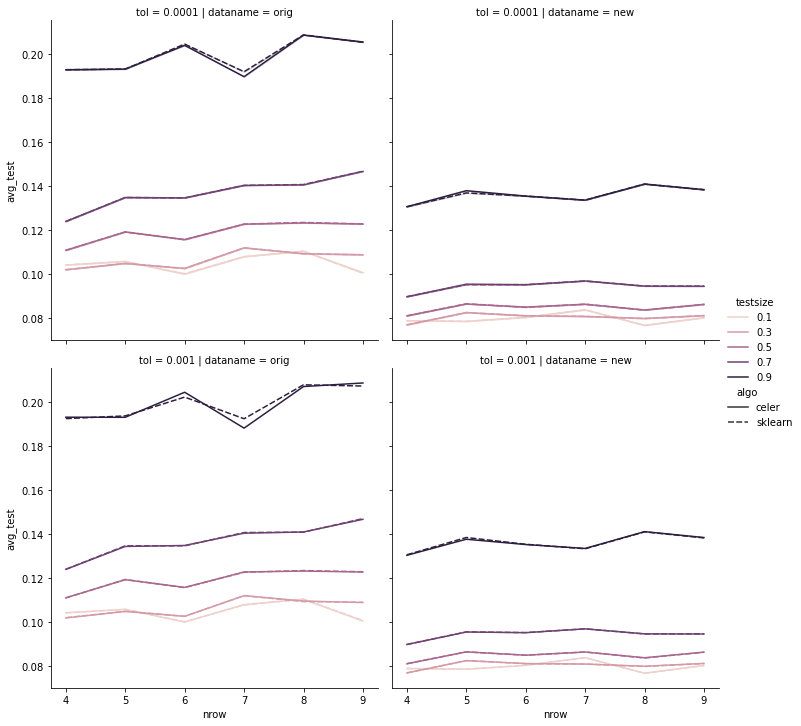

In [25]:
sns.relplot(
    data=dftemp, x='nrow', y='avg_test',
    col='dataname', row='tol', style='algo', hue='testsize',
    kind='line',
)

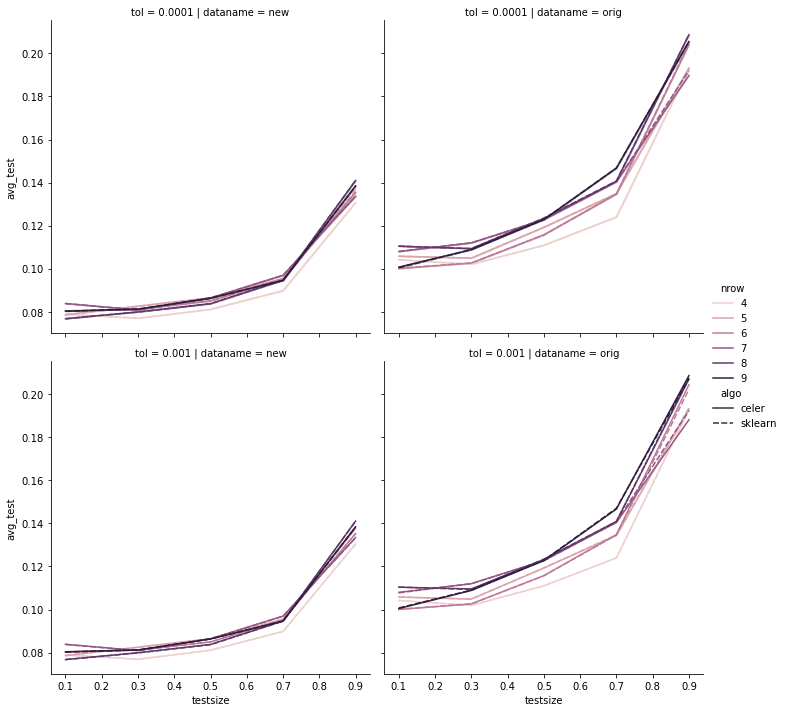

In [71]:
sns.relplot(
    data=dftemp, x='testsize', y='avg_test',
    col='dataname', row='tol', style='algo', hue='nrow',
    kind='line',
)

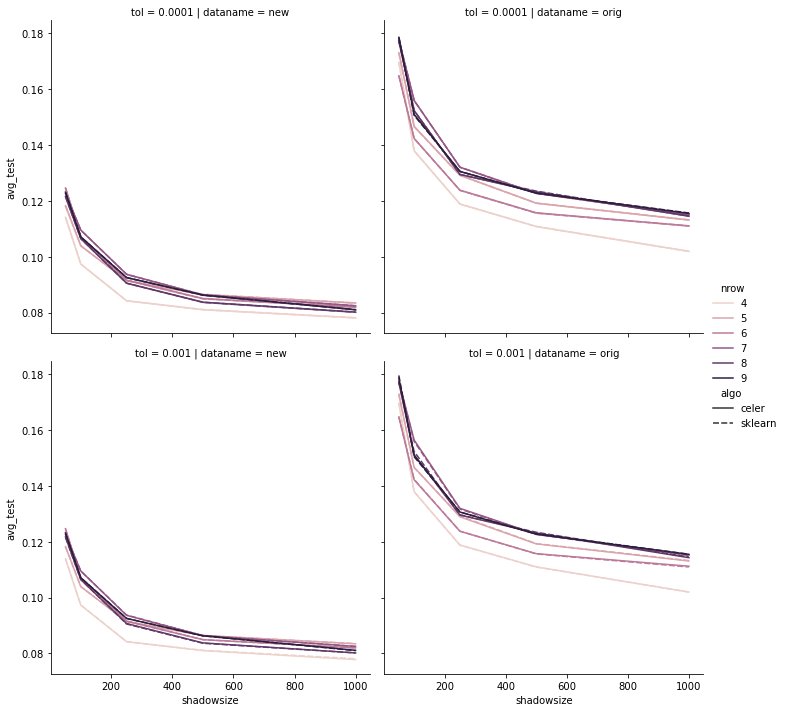

In [67]:
dftemp = df[(df['qubitdist']==1) & (df['testsize']==0.5) ]
sns.relplot(
    data=dftemp, x='shadowsize', y='avg_test',
    col='dataname', row='tol', style='algo', hue='nrow',
    kind='line',
)